# Machine Learning
## Regresión Lineal
- La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en ML y en estadística.
- La regresión lineal es una aproximación para modelar la relacion entre una variable escalar dependiente 'y' y una o más varriables explicativas 'x'.
- La idea es dibujar una recta que indicará la tendencia del conjunto de datos.

    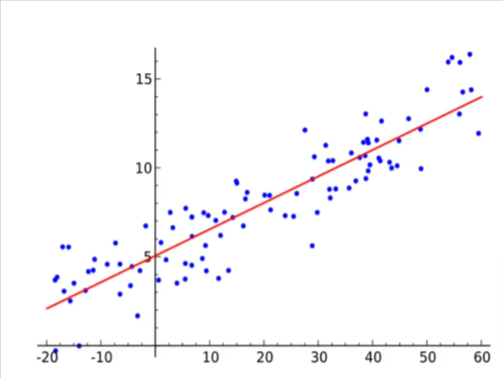

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
casas = pd.read_csv('./USA_Housing.csv')
casas.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
casas['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

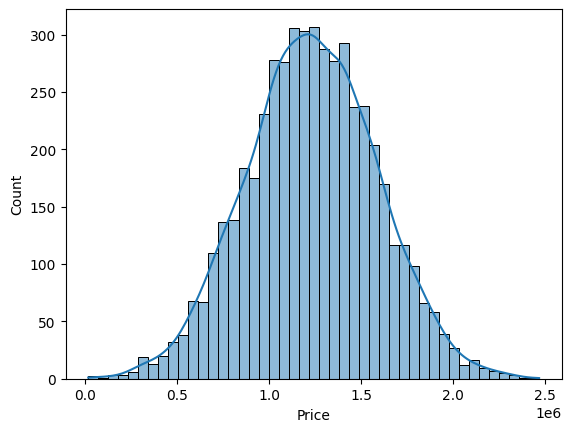

In [ ]:
# sns.distplot(casas['Price'], kde=True)

sns.histplot(casas['Price'], kde=True) # Histograma

<Axes: >

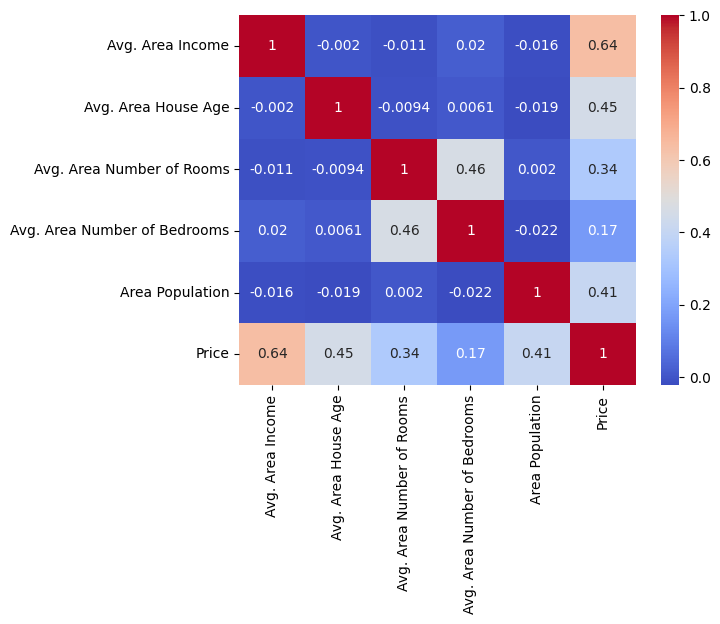

In [19]:
# Seleccionar solo las columnas numéricas
casas_numeric = casas.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación y generar el heatmap
sns.heatmap(casas_numeric.corr(), annot=True, cmap='coolwarm')

### Proceso de ML



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
casas.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [22]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [25]:
x = casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [27]:
y = casas['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1840,55245.337288,3.965745,8.961106,4.38,43557.943435
2115,62305.638407,6.490769,7.647362,3.19,47066.617420
4437,77345.472379,5.407515,8.243178,3.11,26706.911029
1146,65846.171039,6.385374,6.804131,3.18,28214.363551
2486,69350.793357,6.910415,8.288048,4.29,36779.058567
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


In [30]:
x_test


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
3563,74208.124644,6.259782,8.666717,3.38,25507.336340
1538,71112.350296,5.612677,7.419542,4.26,24134.413996
1837,63665.394418,6.729105,7.732959,3.43,44029.681816
2380,56073.892443,6.576733,6.959056,4.40,64149.680213


In [31]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

### Evaluar el rendimiento del modelo

In [32]:
from sklearn import metrics

In [35]:
predicciones = lrmodel.predict(x_test)
predicciones

array([1308536.13592598, 1237122.72746456, 1243835.62817087, ...,
       1457119.79297219, 1483428.95309288, 1047510.59737212])

In [36]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
3563    1.348222e+06
1538    1.309937e+06
1837    1.472887e+06
2380    1.409762e+06
1912    1.009606e+06
Name: Price, Length: 1500, dtype: float64

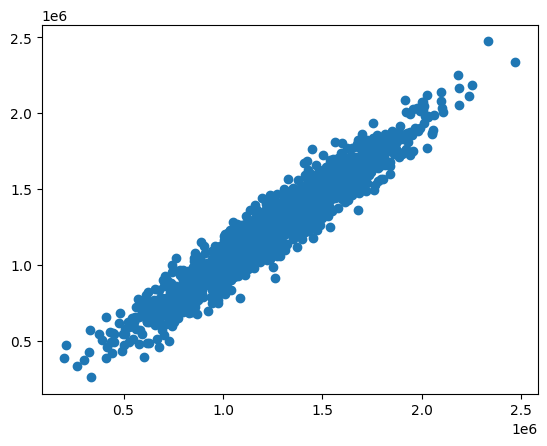

In [37]:
plt.scatter(y_test, predicciones)

<Axes: xlabel='Price', ylabel='Count'>

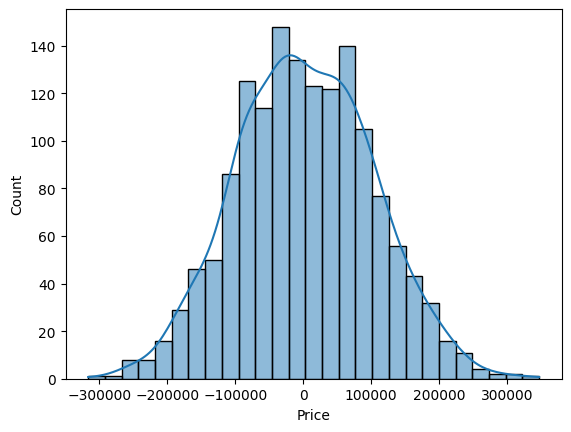

In [38]:
sns.histplot(y_test-predicciones, kde=True)

MAE (Mean Absolute Error) - Media del valor absoluto de la diferencia entre las predicciones y los valores reales

In [39]:
metrics.mean_absolute_error(y_test, predicciones)

np.float64(81135.5660933687)

MSE (Mean Squared Error) - Media de los errores al cuadrado

In [40]:
metrics.mean_squared_error(y_test, predicciones)

np.float64(10068422551.400827)

RMSE (Root Mean Squared Error) - Es una medida de la calidad de un modelo de regresión lineal. Se mide en términos de la distancia medida entre la predicción y la observación real.

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predicciones))

np.float64(100341.5295448541)